In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [32]:
names = ['a1','a2','a3','a4','a5','a6','a7','a8']
df = pd.read_csv("data/HTRU_2.csv", sep=',', names=names+['cls'])
df

,a1,a2,a3,a4,a5,a6,a7,a8,cls
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [34]:
X = np.c_[tuple(df[n].values for n in names)]
Y = df['cls'].values

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [39]:
X = scale(X)

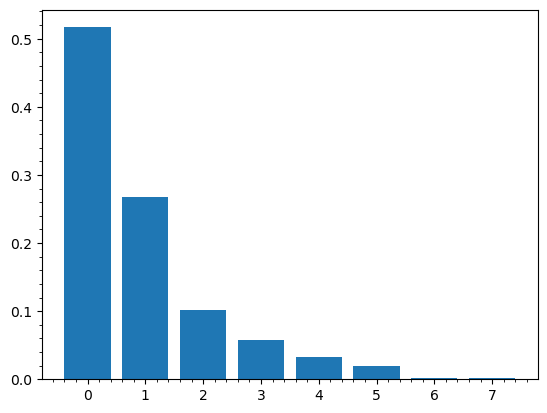

In [41]:
pca_sk = PCA()
pca_sk.fit(X)
plt.bar(range(len(names)), pca_sk.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

In [43]:
from numpy.linalg import eigvals

In [46]:
S = X.T @ X
L = eigvals(S)
L /= L.sum()
print(L)

[0.51675584 0.26807564 0.10116862 0.0571781  0.03227836 0.01998491
 0.00255524 0.00200328]


In [47]:
X0 = X

In [48]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
amf = af.averaging_function("AM")

[ 5.93508431e-17 -5.60195537e-15 -1.73747608e-15 -6.92019169e-16
  5.06963389e-16 -5.41932499e-15  2.42407998e-15  9.66467194e-16]


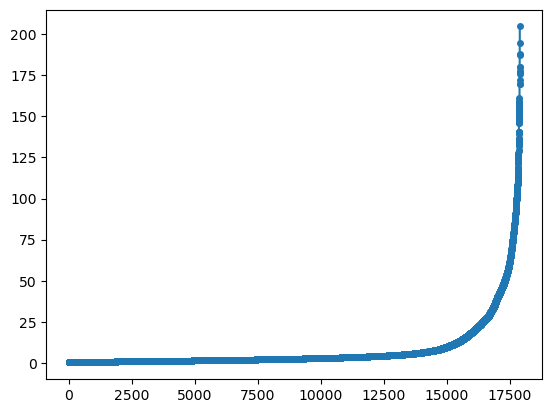

In [51]:
c0 = pca.find_center(X0)
print(c0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4)
plt.show()

[ 0.04626366  0.04952036 -0.09140375 -0.13354081  0.05553287  0.07705051
 -0.03430646 -0.03704987]


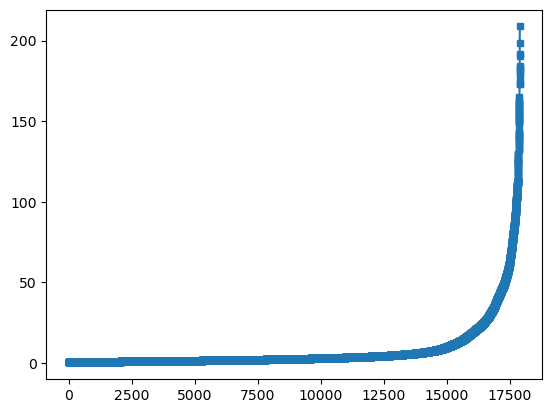

In [55]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.95)
c = pca.find_rob_center(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=4)
plt.show()

In [56]:
X1 = X0 - c
X1_0 = X0 - c0

In [57]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

4.134046703618399 [-0.35966214 -0.21234794  0.41613652  0.4014866   0.34562564  0.38632122
 -0.37021551 -0.29228361]


In [88]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.95)
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)

3.112841081016377 [ 0.26167589  0.11272431 -0.27390765 -0.19946611 -0.3967401  -0.51262529
  0.48586537  0.38438818]


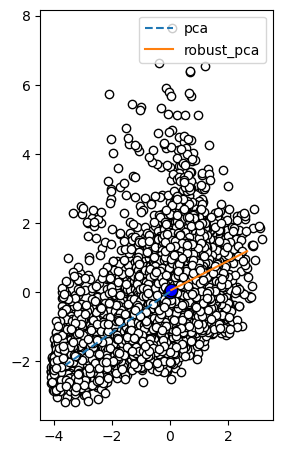

In [89]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='b', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='b', edgecolors='k')
plt.plot([c0[0], c0[0]+10*a1_0[0]], [c0[1], c0[1]+10*a1_0[1]], linestyle='--', label='pca')
plt.plot([c[0], c[0]+10*a1[0]], [c[1], c[1]+10*a1[1]], label='robust_pca')
plt.legend()
plt.show()

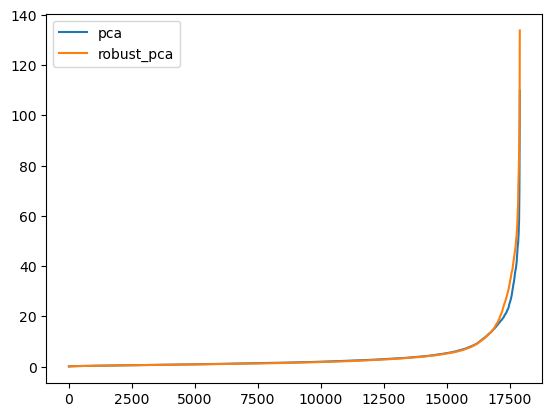

In [90]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), label='robust_pca')
plt.legend()
plt.show()

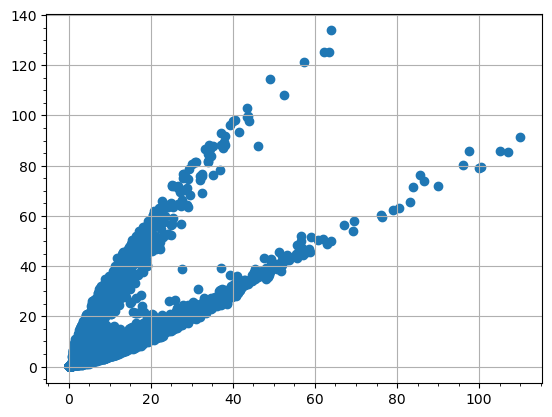

In [91]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [92]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [93]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

2.144605097611313 [-0.36188491 -0.4302135   0.31813969  0.3057701  -0.24791764 -0.31722695
  0.41102232  0.39775872]


In [94]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.95)
a2, L2 = pca.find_rob_pc(X2, wma)
print(L2, a2)

2.273648057659381 [-0.48094567 -0.4547714   0.44206151  0.41223252 -0.1002159  -0.21151075
  0.27234672  0.25993738]


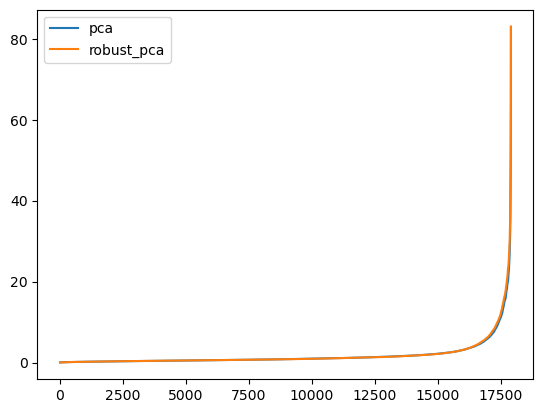

In [95]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


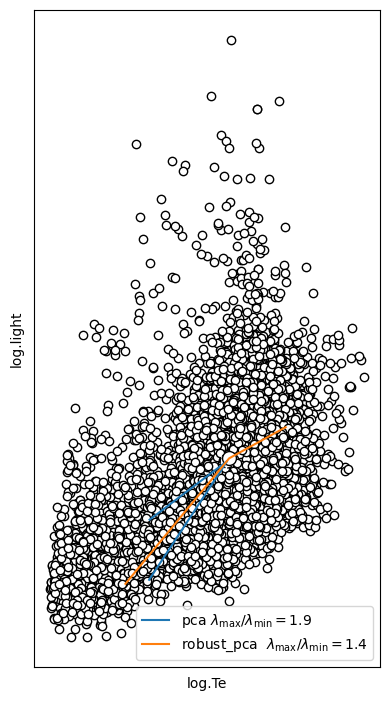

In [97]:
aa = 16/9
plt.figure(figsize=(4,4*aa))
plt.scatter(X0[:,0], X0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+5*a1_0[0], c0[0], c0[0]+5*a2_0[0]], [c0[1]+5*a1_0[1], c0[1], c0[1]+5*a2_0[1]], 
         label=r'pca $\lambda_\max/\lambda_\min=%.1f$' % (max(L2_0,L1_0)/min(L2_0,L1_0)))
plt.plot([c[0]+5*a1[0], c[0], c[0]+5*a2[0]], [c[1]+5*a1[1], c[1], c[1]+5*a2[1]], 
         label='robust_pca  $\lambda_\max/\lambda_\min=%.1f$' % (max(L2,L1)/min(L2,L1)))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_HTRU.eps')
plt.show()

In [62]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [63]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
S = robust_scatter_matrix(X1, wma)
print(S)

[[ 1.63326844e+00 -3.38169486e-01  2.87298460e+00 -1.73942550e+00
   3.37336972e-02 -2.56889478e-02  1.68402638e-01 -1.09663379e-01]
 [-3.38169486e-01  4.63624256e-01 -7.17498334e-01  8.88012234e-01
  -5.13621716e-02  2.58414425e-02  1.26384125e-01 -9.30686175e-02]
 [ 2.87298460e+00 -7.17498334e-01  8.23593298e+00 -6.91299899e+00
  -2.03801964e-01  3.65860021e-02  2.08703090e-01 -8.38936349e-02]
 [-1.73942550e+00  8.88012234e-01 -6.91299899e+00  7.58957242e+00
   1.33838143e-01  7.87767563e-03  4.06728055e-01 -3.36765613e-01]
 [ 3.37336972e-02 -5.13621716e-02 -2.03801964e-01  1.33838143e-01
   1.29273130e+00 -7.65145671e-01  7.00841464e-01 -6.99874721e-01]
 [-2.56889478e-02  2.58414425e-02  3.65860021e-02  7.87767563e-03
  -7.65145671e-01  2.02779578e+00  2.82616941e+00 -1.66024276e+00]
 [ 1.68402638e-01  1.26384125e-01  2.08703090e-01  4.06728055e-01
   7.00841464e-01  2.82616941e+00  9.05418103e+00 -6.43021849e+00]
 [-1.09663379e-01 -9.30686175e-02 -8.38936349e-02 -3.36765613e-01
  -

In [65]:
L, A = np.linalg.eig(S)
print(L / L.sum())
print(A)
np.dot(A[0], A[1])

[0.44643977 0.41548244 0.06441484 0.04576377 0.01409991 0.0018266
 0.00356405 0.00840862]
[[-0.22329939  0.05302248  0.11905302  0.63669993 -0.4043843  -0.28304
   0.5310153  -0.0463684 ]
 [ 0.07757495 -0.00152139 -0.02418501  0.06203473  0.76182755 -0.12121972
   0.51121741  0.36486697]
 [-0.69750304  0.13209579  0.04104423  0.39492551  0.31084364  0.27608416
  -0.39795671  0.0846974 ]
 [ 0.65889887 -0.0701852   0.06623089  0.63996241  0.10732089  0.20318069
  -0.30571375  0.02695986]
 [ 0.0234734   0.05340578  0.69095325 -0.14687751 -0.23275865  0.37362319
   0.09504279  0.54295803]
 [ 0.03285901  0.24424663 -0.67818693  0.03133408 -0.25769921  0.48936379
   0.2002683   0.36380124]
 [ 0.11724223  0.77503002  0.00980344 -0.01732032 -0.03352778 -0.4873997
  -0.27126068  0.27004016]
 [-0.08991579 -0.55823912 -0.20425546  0.04890827 -0.16199072 -0.41359353
  -0.28657668  0.59728145]]


-1.1796119636642288e-16

In [67]:
U1 = X1 @ A[0]
U2 = X1 @ A[1]


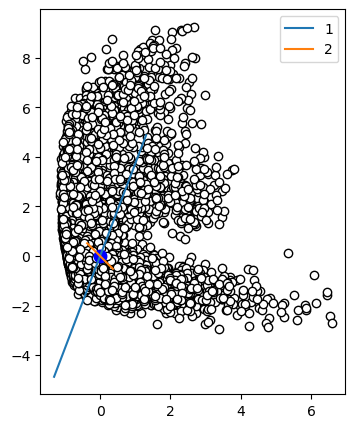

In [73]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(U2, U3, c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-5*U2[0], 0, 5*U2[0]], [-5*U3[0], 0, 5*U3[0]], label='1')
plt.plot([-5*U2[1], 0, 5*U2[1]], [-5*U3[1], 0, 5*U3[1]], label='2')
plt.legend()
plt.show()

In [23]:
from sklearn.decomposition import PCA

In [28]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[-0.14029465  0.9901098 ]
 [-0.9901098  -0.14029465]]


array([4.31      , 5.01212766])

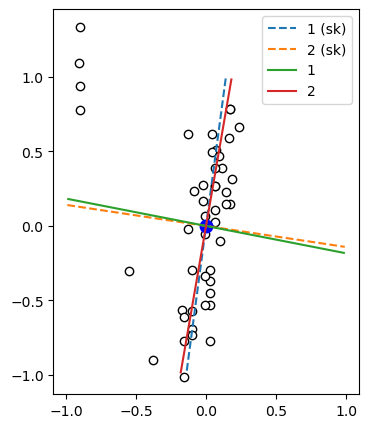

In [25]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()